In [ ]:
""" 
fit spline to strokes.
Generally useful for a few things.

Main focus now is using this as a "negative control' for the 
manifold analysis.

Also use to test compositionality, similar to Brenden BPL.
"""


In [2]:
%load_ext autoreload
%autoreload 2

%cd ..

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *
from analysis.strok import *
from analysis.line2 import *
from analysis.probedatTaskmodel import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
from pythonlib.drawmodel.image import *
from analysis.strok import *

%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/data1/code/python/drawmonkey
NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


## PUTTING IT TOGETHER

In [3]:
# 1) Load a task
expt = "lines5"
animal = "Pancho"

FD, exptMetaDat = loadMultDataForExpt(expt,animal, whichdates=[-1], metadatonly=False)
PD = loadProbeDatWrapper(FD, exptMetaDat)
P = ProbedatTaskmodel(PD, exptMetaDat)

# === preprocess to prepare tasks
Tasks = P.extractTasksAsClass("all")

# === pull out an ind for example. tell me what kind of task to get.
Pp = P.pandas()
np.where(Pp["task_stagecategory"]=="3linePlusL")
# np.where(Pp["task_stagecategory"]=="linePlusL")

This is metadat:
{'sdate': 200921, 'edate': 201001, 'strokmodel_kind': 'spatial', 'strokmodel_tstamp': '201006_032853_lines5', 'datecategories': {'200921': 1, '200922': 1, '200923': 1, '200924': 1, '200925': 2, '200926': 2, '200927': 2, '200928': 2, '200929': 2, '200930': 2, '201001': 2}, 'dates_for_summary': ['200923', '200924', '200929', '200930', '201001'], 'matchedstrokes': None, 'exptnames': ['lines5'], 'tasknames_G1': [], 'tasknames_G2': ['C', 'triangle', 'S', 'h', 'tristar', 'F', 'linePlusLv2'], 'tasknames_G3': ['2linePlusL', 'LplusL', 'linePlusLv2', '3linePlusL'], 'description': '', 'expt': 'lines5', 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}}

Getting these dates:
['201001']
Pancho 201001 lines5 0
- No h5 file for Pancho, 201001, lines5, 0 - returning No

(array([117, 140, 153, 172, 178, 197, 247, 249, 256, 279, 280, 322, 350,
        353, 355, 398, 401, 402, 435, 438, 472, 494, 505, 528, 549, 558,
        574, 607, 608]),)

In [7]:
T = Tasks[117]



In [ ]:
# === parsing


## PREVIOUS DEVO

In [ ]:
from scipy.interpolate import make_interp_spline as spline

x = np.array([0, 1, 2, 1])
y = np.array([0, 1, 2, 3])
t = np.linspace(0, 1, len(x))

plt.figure()
plt.plot(x, y)

spl = spline(t, np.c_[x.T, y.T])

tnew = np.linspace(0, 1, 100)
x_, y_ = spl(tnew).T
plt.plot(x_, y_, '-')



In [ ]:
def cheb_nodes(N):

    jj = 2.*np.arange(N) + 1

    x = np.cos(np.pi * jj / 2 / N)[::-1]

    return x



x = cheb_nodes(20)

y = np.sqrt(1 - x**2)



from scipy.interpolate import BSpline, make_interp_spline

b = make_interp_spline(x, y)

np.allclose(b(x), y)

In [ ]:
y_ = b(x)
plt.figure()
plt.plot(x, y)
plt.plot(x, y_)


### TRy out on a figure

Plan

1. get all control points:
-- endpoints and intersections
-- have some noise for enpoints
-- how deal with circle?

2. Get large num of random permutations of order and direction
-- sort permutations by length, 
-- make sure to include the obvious ones --> start at any of the endpoints and go in order of proximity.


3. sample start position, then for gap between endpoint and start of next stroke, randomly decide whether to cut it.
-- based on distrubtion of gaps for animal.
-- 

4. verify that spatial score is similar to animal.


### Rephrasing plan, using BPL approach

1. get random parses using random walk method.

2. fit spline and chop spline to get strokes
    
    a. cut differently to test compositionality
    
3. 

In [32]:
# 1) Load a task
expt = "lines5"
animal = "Pancho"

FD, exptMetaDat = loadMultDataForExpt(expt,animal, whichdates=[-1], metadatonly=False)
PD = loadProbeDatWrapper(FD, exptMetaDat)
P = ProbedatTaskmodel(PD)


# === preprocess to prepare tasks
Tasks = P.extractTasksAsClass("all")


# === pull out an ind for example. tell me what kind of task to get.
Pp = P.pandas()
np.where(Pp["task_stagecategory"]=="3linePlusL")
# np.where(Pp["task_stagecategory"]=="linePlusL")

This is metadat:
{'sdate': 200921, 'edate': 201001, 'strokmodel_kind': 'spatial', 'strokmodel_tstamp': '201006_032853_lines5', 'datecategories': {'200921': 1, '200922': 1, '200923': 1, '200924': 1, '200925': 2, '200926': 2, '200927': 2, '200928': 2, '200929': 2, '200930': 2, '201001': 2}, 'dates_for_summary': ['200923', '200924', '200929', '200930', '201001'], 'matchedstrokes': None, 'exptnames': ['lines5'], 'tasknames_G1': [], 'tasknames_G2': ['C', 'triangle', 'S', 'h', 'tristar', 'F', 'linePlusLv2'], 'tasknames_G3': ['2linePlusL', 'LplusL', 'linePlusLv2', '3linePlusL'], 'description': '', 'expt': 'lines5', 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}}


UnboundLocalError: local variable 'datelist' referenced before assignment

In [ ]:
# === what ind to process for example?
ind = 117

# == CONVERT TASK INTO BINARY IMAGE
from pythonlib.drawmodel.primitives import prog2pxl

canvas_max_WH = 400
image_WH = 105
# image_WH = 48
T = Tasks[ind]
p = T.Strokes
I = prog2pxl(p, WHdraw=canvas_max_WH*2, WH=image_WH, smoothing=1)

# plot strokes
fig, ax = plt.subplots(figsize=(10,10))
plotDatStrokes(p, ax, each_stroke_separate=True)

# plot
plt.figure()
plt.imshow(I)

fig, ax = plt.subplots()
T.plotTaskOnAx(ax)

# plot hist of values
plt.figure()
plt.hist(I[:], log=True)

# binarize
I = np.array(I>0.5)

# plot
plt.figure()
plt.imshow(I)
plt.title("after binarize")

print(I.shape)



In [ ]:
# === TESTING, PASSING IN JUNCTIONS BY HAND, AND "SNAPPING" TO SKELETON
# TO HAND INPUT CORNERS AS JUNCTIONS.

# 1) coordinates, in monkey sketchpad space

# 2) convert coordinate to skeletion image space

# 3) pass into parsing
import matlab.engine
eng = matlab.engine.start_matlab()
bpl_path = os.environ['BPL_PATH']
eng.addpath(eng.genpath(bpl_path), nargout=0)
img = matlab.logical(I.tolist())
J = eng.test_random_parses_LT(img)
J = np.asarray(J)


# - plot junctions.
plt.figure()
plt.imshow(J)
np.sum(J)






In [3]:

    
Ithis = np.zeros_like(I)
strokes = Tasks[ind].Strokes
sketchpad_edges = np.array([[-canvas_max_WH, canvas_max_WH], [-canvas_max_WH, canvas_max_WH]])
image_edges = np.array([[1, image_WH-1], [1, image_WH-1]])
# image_edges = np.array([[0, image_WH], [0, image_WH]])

pts_all = []

for pts in strokes:
    pts_image_inds = convStrokecoordToImagecoord(pts, sketchpad_edges, image_edges)
    
    pts_all.append(pts_image_inds)
    for pt in pts_image_inds:
#         print(pt)
        Ithis[pt[0], pt[1]] = True
    
plt.figure()
plt.imshow(Ithis)
    
    
# - also plot the bitmap strokes
plt.figure(figsize=(15,15))
plt.imshow(I)
# - overlay circles where where stroke inds are extracted
pts_all = np.concatenate(pts_all)
plt.scatter(pts_all[:,1], pts_all[:,0], marker="x")


NameError: name 'I' is not defined

In [ ]:
# === collect extra junctions, all stroke endpoints
Ithis = np.zeros_like(I)
strokes = Tasks[ind].Strokes
sketchpad_edges = np.array([[-canvas_max_WH, canvas_max_WH], [-canvas_max_WH, canvas_max_WH]])
image_edges = np.array([[1, image_WH-1], [1, image_WH-1]])

extra_junctions = []
for pts in strokes:
    pts_image_inds = convStrokecoordToImagecoord(pts, sketchpad_edges, image_edges)
    extra_junctions.append(pts_image_inds[0])
    extra_junctions.append(pts_image_inds[-1])
    
extra_junctions = np.stack(extra_junctions, axis=0)
print(extra_junctions)

In [ ]:
# == for each pt in extra junction, find the nearest 1 in the image

# get list of pts that are 1 in the image
tmp = np.where(I)
pts_in_image = np.c_[tmp[0].T, tmp[1].T]

# get pairwise distance between extra junctions and pts in image, 
# in order to get min
from scipy.


In [ ]:
for row in extra_junctions:
    i, j = row
    print(I[i-2:i+3, j-2:j+3])
    

In [ ]:
# PICK OUT single extra junction by eye, for testing.
print(I[45, 37])
extra_junctions = np.array([46, 36])

# print(I[34, 51])
# extra_junctions = np.array([34, 51])

In [ ]:
# === PARSE USING PYBPL
import math
import imageio
import numpy as np
import matplotlib.pylab as plt

from pybpl.util import dist_along_traj
from pybpl.matlab.bottomup import generate_random_parses



def plot_stroke(ax, stk, color, lw=2):
    if len(stk) > 1 and dist_along_traj(stk) > 0.01:
        ax.plot(stk[:,0], -stk[:,1], color=color, linewidth=lw)
    else:
        ax.plot(stk[0,0], -stk[0,1], color=color, linewidth=lw, marker='.')

def plot_parse(ax, strokes, lw=2):
    ns = len(strokes)
    colors = ['r','g','b','m','c']
    for i in range(ns):
        plot_stroke(ax, strokes[i], colors[i], lw)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0,105)
    ax.set_ylim(105,0)

    

# load image to numpy binary array
# img = imageio.imread('./image_H.jpg')
img = I
# generate random parses
parses = generate_random_parses(img, seed=3, max_ntrials=150, max_nwalk=150,
                                        max_nstroke=100, ver="lucas", 
                                        extra_junctions=extra_junctions)
# parses = generate_random_parses(img, seed=3, ver="lucas")
# parses = generate_random_parses(img, seed=3,max_ntrials=150, max_nwalk=150,
#                                         max_nstroke=100, ver="reuben")

In [ ]:
# plot parsing results
nparse = len(parses)
n = math.ceil(nparse/10)
m = 10
fig, axes = plt.subplots(n,m+1, figsize=(2*(m+1), 2*n), squeeze=False)

# first column
axes[0,0].imshow(img, cmap=plt.cm.binary)
axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,0].set_title('Input')
for i in range(1,n):
    axes[i,0].set_axis_off()
# remaining_columns
for i in range(n):
    for j in range(1,m+1):
        ix = i*m + (j-1)
        if ix >= nparse:
            axes[i,j].set_axis_off()
            continue
        try:
            plot_parse(axes[i,j], parses[ix])
        except IndexError:
            print(ix)
            continue
plt.subplots_adjust(hspace=0., wspace=0.)
plt.show()

In [ ]:
# plot parsing results
nparse = len(parses)
n = math.ceil(nparse/10)
m = 10
fig, axes = plt.subplots(n,m+1, figsize=(2*(m+1), 2*n), squeeze=False)

# first column
axes[0,0].imshow(img, cmap=plt.cm.binary)
axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,0].set_title('Input')
for i in range(1,n):
    axes[i,0].set_axis_off()
# remaining_columns
for i in range(n):
    for j in range(1,m+1):
        ix = i*m + (j-1)
        if ix >= nparse:
            axes[i,j].set_axis_off()
            continue
        try:
            plot_parse(axes[i,j], parses[ix])
        except IndexError:
            print(ix)
            continue
plt.subplots_adjust(hspace=0., wspace=0.)
plt.show()

In [ ]:
# === 2) Given Task, general purpose parsing function

n = len(parses)
ncols = 4
nrows = int(np.ceil(n/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))

for p, ax in zip(parses, axes.flatten()):
#     ax.set_xlim([0, 105])
#     ax.set_ylim([-105, 0])
#     plotDatStrokes(p, ax)
    p = fakeTimesteps(p, p[0], "in_order")
    plotDatStrokesTimecourse(p, ax, plotver="raw")
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
for p, ax in zip(parses, axes.flatten()):
    ax.set_xlim([0, 105])
    ax.set_ylim([-105, 0])
    plotDatStrokes(p, ax)
#     p = fakeTimesteps(p, p[0], "in_order")
#     plotDatStrokesTimecourse(p, ax, plotver="raw")
    
#     print(p)
#     assert False
# fig, ax = plt.subplots()
# plotDatStrokes(parses[0], ax, each_stroke_separate=True)

In [ ]:
# == POSTPROCESSING
# see "get_topK_parses" in GNS/experiments/classification
# NOTE: not actually working below. just copying for note and to 
# implement in future.

# 1) Fit splines
base_parses = [process_parse(parse, device) for parse in base_parses]


# Get top K parses, allowing for permutations and ordering flips, 
# and scoring using GNS model:
np.random.seed(seed)
n = len(base_parses)
parses = []; log_probs = []
for i in range(n):
    parses_i, log_probs_i = search_parse(
        base_parses[i], score_fn, configs_per, trials_per)
    parses.extend(parses_i)
    log_probs.append(log_probs_i)
log_probs = torch.cat(log_probs)

# Refine to unique
log_probs, idx = np.unique(log_probs.cpu().numpy(), return_index=True)
log_probs = torch.from_numpy(log_probs).flip(dims=[0])
idx = torch.from_numpy(idx).flip(dims=[0])
parses = [parses[i] for i in idx]


### GOOD (task strokes --> image --> parses)


In [21]:
import numpy as np

# max width or hiegh (whichever one greater), num pixels for
# half of page, so that sketchpad will be square with edges in 
# both dimensions of : (-WH, WH)
canvas_max_WH = 400 

# num pixels per dimension for the output image
image_WH = 105 # I think 105 is used for pyBPL


In [22]:
T = Tasks[100]
strokes = T.Strokes


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(105, 105)


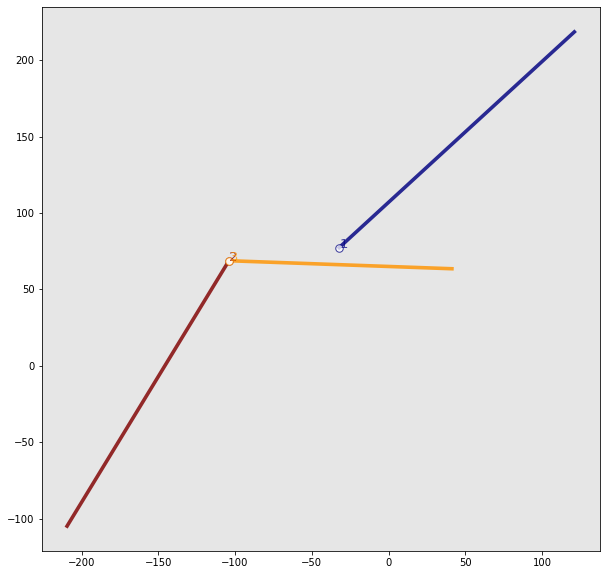

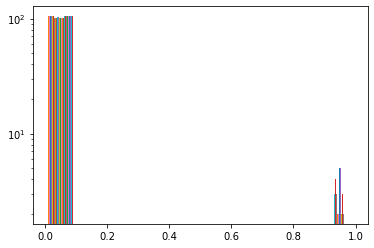

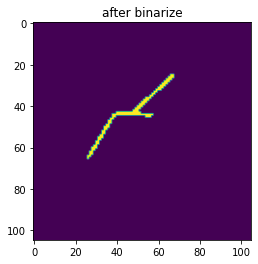

In [23]:
# == CONVERT TASK INTO BINARY IMAGE
from pythonlib.drawmodel.primitives import prog2pxl

I = prog2pxl(strokes, WHdraw=canvas_max_WH*2, WH=image_WH, smoothing=1)
I = np.array(I>0.5) # binarize

# ----- PLOTS
# plot strokes
fig, ax = plt.subplots(figsize=(10,10))
plotDatStrokes(p, ax, each_stroke_separate=True)

# plot hist of values
plt.figure()
plt.hist(I[:], log=True)

# plot
plt.figure()
plt.imshow(I)
plt.title("after binarize")

print(I.shape)



In [24]:
# === Get endpoints of segments in vectorized image (i..e, strokes), to force
# parsing to incorporate corners. is ok to also pass in endpoints, but those will
# be ignore by parsing since they will be found anyway.
    
sketchpad_edges = np.array([[-canvas_max_WH, canvas_max_WH], [-canvas_max_WH, canvas_max_WH]])
image_edges = np.array([[1, image_WH-1], [1, image_WH-1]]) # 1 on edges, since there is a slight border.

extra_junctions = []
for pts in strokes:
    pts_image_inds = convStrokecoordToImagecoord(pts, sketchpad_edges, image_edges)
    extra_junctions.append(pts_image_inds[0])
    extra_junctions.append(pts_image_inds[-1])
    
extra_junctions = np.stack(extra_junctions, axis=0)
print(extra_junctions)

[[43 48]
 [24 68]
 [44 39]
 [66 26]
 [44 39]
 [44 58]]


In [29]:
# === PARSE USING PYBPL
from pybpl.matlab.bottomup import generate_random_parses
img = I
# generate random parses
parses = generate_random_parses(img, seed=3, max_ntrials=150, max_nwalk=150,
                                        max_nstroke=100, ver="lucas", 
                                        extra_junctions=extra_junctions)
# parses = generate_random_parses(img, seed=3, ver="lucas")
# parses = generate_random_parses(img, seed=3,max_ntrials=150, max_nwalk=150,
#                                         max_nstroke=100, ver="reuben")

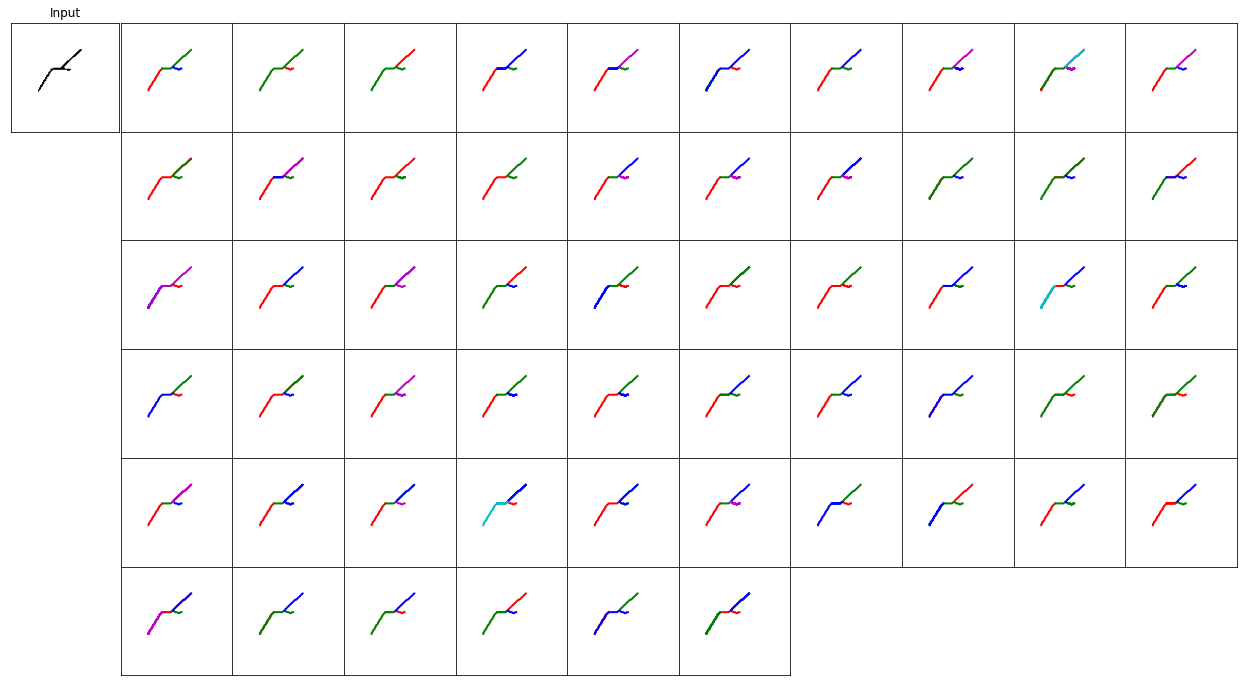

In [31]:
# == PLOT PARSES (from pyBPL)
import math
import imageio
import numpy as np
import matplotlib.pylab as plt
from pybpl.util import dist_along_traj


def plot_stroke(ax, stk, color, lw=2):
    if len(stk) > 1 and dist_along_traj(stk) > 0.01:
        ax.plot(stk[:,0], -stk[:,1], color=color, linewidth=lw)
    else:
        ax.plot(stk[0,0], -stk[0,1], color=color, linewidth=lw, marker='.')

def plot_parse(ax, strokes, lw=2):
    ns = len(strokes)
    colors = ['r','g','b','m','c']
    for i in range(ns):
        plot_stroke(ax, strokes[i], colors[i], lw)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0,105)
    ax.set_ylim(105,0)

# plot parsing results
nparse = len(parses)
n = math.ceil(nparse/10)
m = 10
fig, axes = plt.subplots(n,m+1, figsize=(2*(m+1), 2*n), squeeze=False)

# first column
axes[0,0].imshow(img, cmap=plt.cm.binary)
axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,0].set_title('Input')
for i in range(1,n):
    axes[i,0].set_axis_off()
# remaining_columns
for i in range(n):
    for j in range(1,m+1):
        ix = i*m + (j-1)
        if ix >= nparse:
            axes[i,j].set_axis_off()
            continue
        try:
            plot_parse(axes[i,j], parses[ix])
        except IndexError:
            print(ix)
            continue
plt.subplots_adjust(hspace=0., wspace=0.)
plt.show()

